# Ploteo de los canales que usaremos extraídos del .edf


Extracting EDF parameters from /Users/diegoromero/Downloads/EDF Ploteo/chb02_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_924/2630199082.py:13: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_924/2630199082.py:16: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in an error because the following channel names are missing:
['T8-P8']
Either fix your included names or explicitly pass ordered=False.
  raw_data_subset = raw_data.pick_channels(selected_channels)


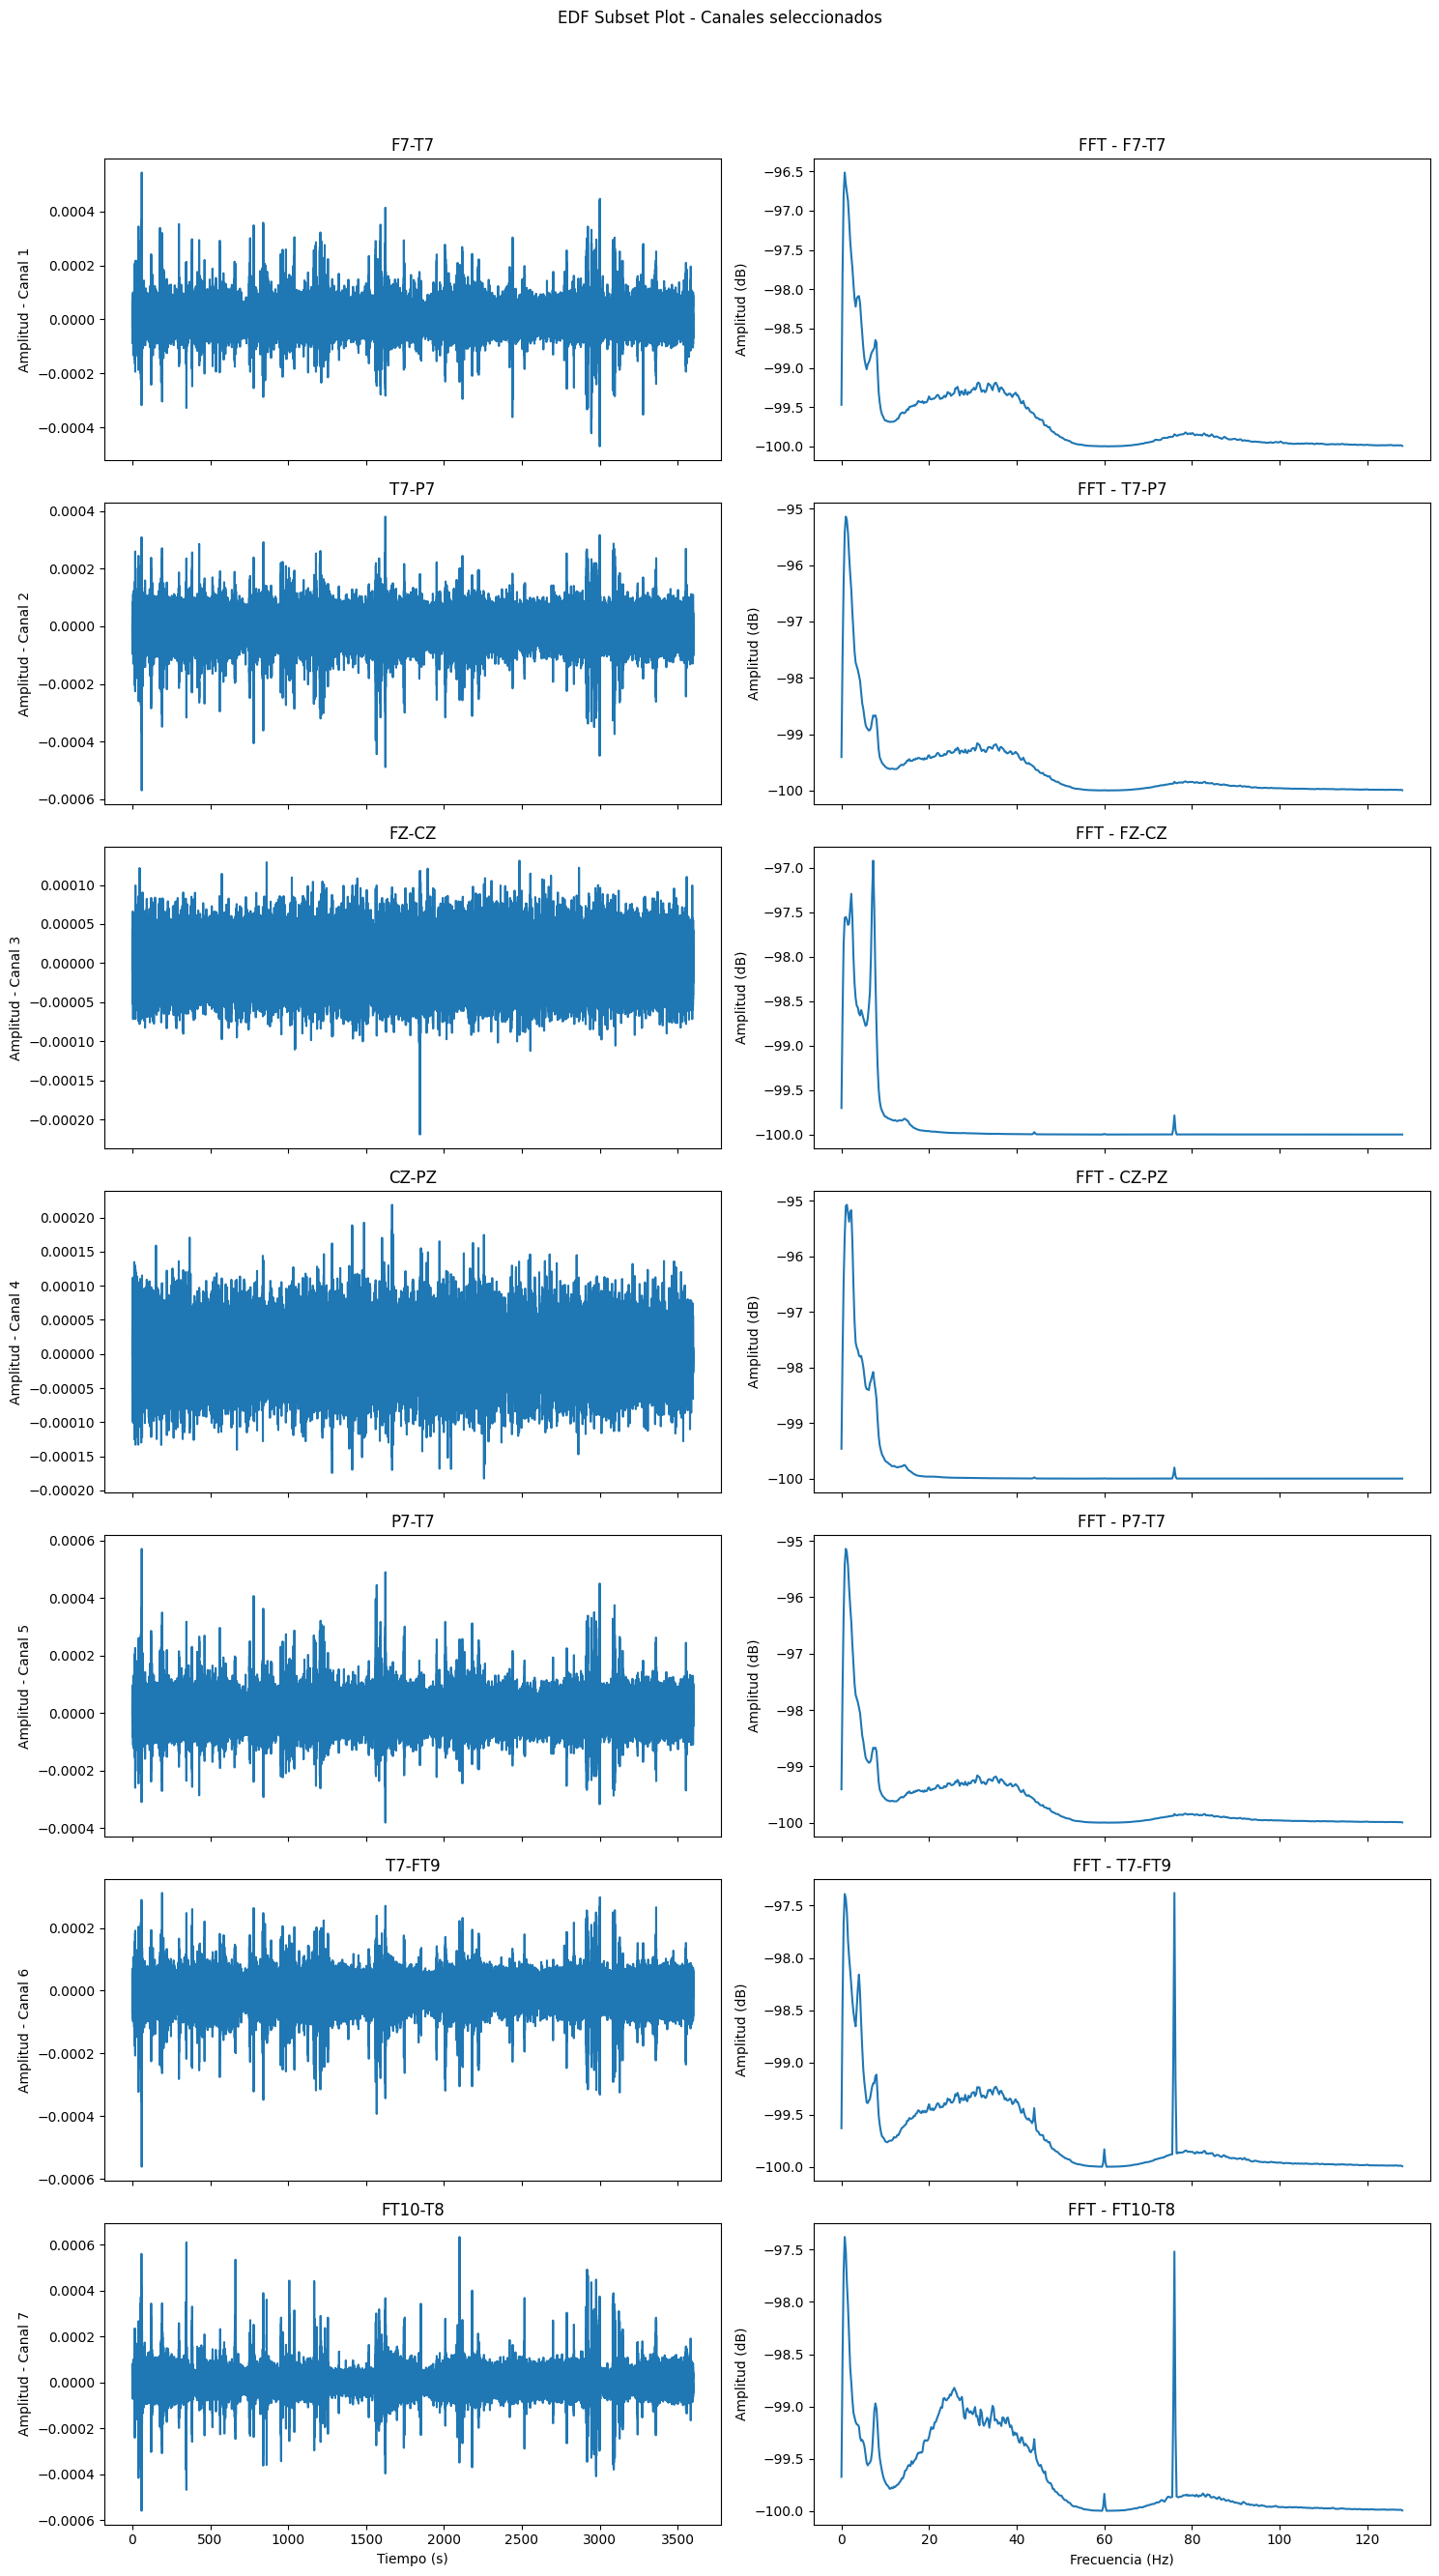

In [30]:
import mne
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Ruta al archivo EDF
edf_file_path = "chb02_02.edf"

# Canales que deseas extraer y plotear
selected_channels = ['F7-T7', 'T7-P7', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT10-T8', 'T8-P8']

# Cargar el archivo EDF
raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)

# Seleccionar y extraer solo los canales deseados
raw_data_subset = raw_data.pick_channels(selected_channels)

# Obtener el tiempo de muestreo (Ts) desde la frecuencia de muestreo (Fs)
Fs = raw_data_subset.info['sfreq']
Ts = 1 / Fs

# Crear un vector de tiempo considerando el periodo de muestreo
t = raw_data_subset.times

# Crear una figura para cada canal
fig, axes = plt.subplots(nrows=len(raw_data_subset.ch_names), ncols=2, figsize=(15, 4 * len(raw_data_subset.ch_names)), sharex='col')
fig.suptitle('EDF Subset Plot - Canales seleccionados')

# Iterar sobre cada canal y plotear
for i, (channel, ax) in enumerate(zip(raw_data_subset.ch_names, axes)):
    # Extraer datos del canal actual
    data = raw_data_subset._data[i]  # Extraer los datos del canal actual

    # Plotear la señal del canal actual
    ax[0].plot(t, data)
    ax[0].set_ylabel(f"Amplitud - Canal {i + 1}")
    ax[0].set_title(channel)

    # Calcular la FFT y representarla en dB
    freq, fft_result = signal.welch(data, Fs, nperseg=1024)
    fft_result_db = 10 * np.log10(fft_result + 1e-10)  # Agrega una pequeña constante

    # Plotear la FFT en dB
    ax[1].plot(freq, fft_result_db)
    ax[1].set_ylabel("Amplitud (dB)")
    ax[1].set_title(f"FFT - {channel}")

# Configuración adicional para la última columna
axes[-1, 0].set_xlabel("Tiempo (s)")
axes[-1, 1].set_xlabel("Frecuencia (Hz)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_facecolor('white')
plt.show()


# Filtrado Wavelet

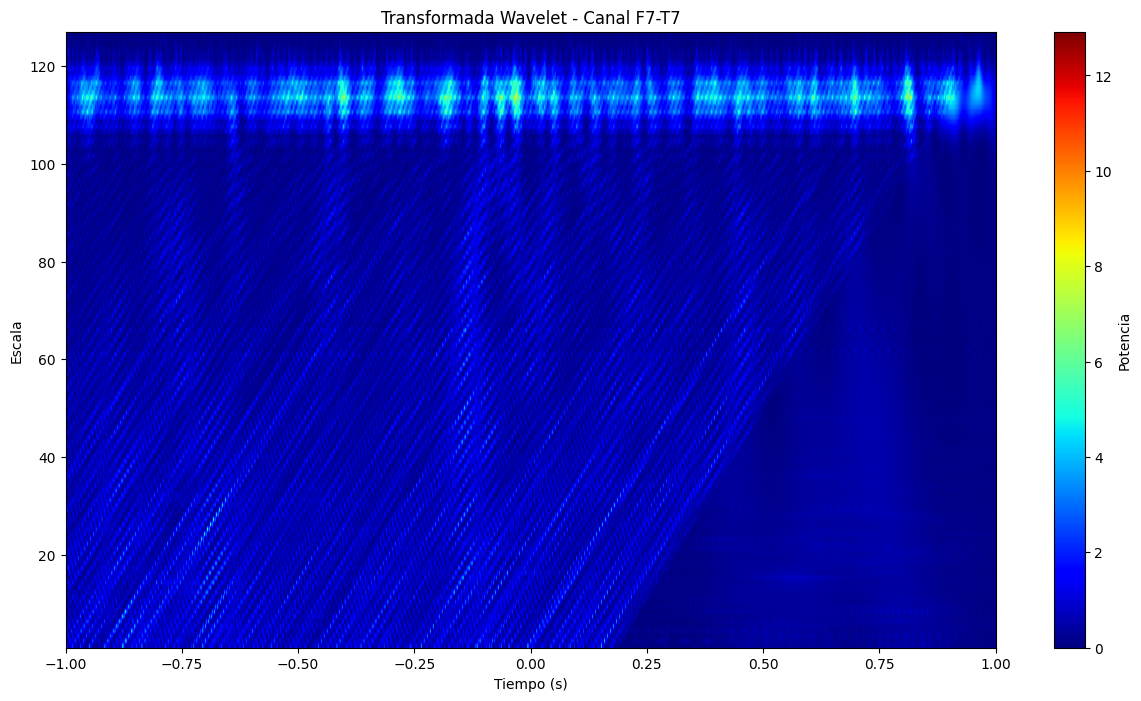

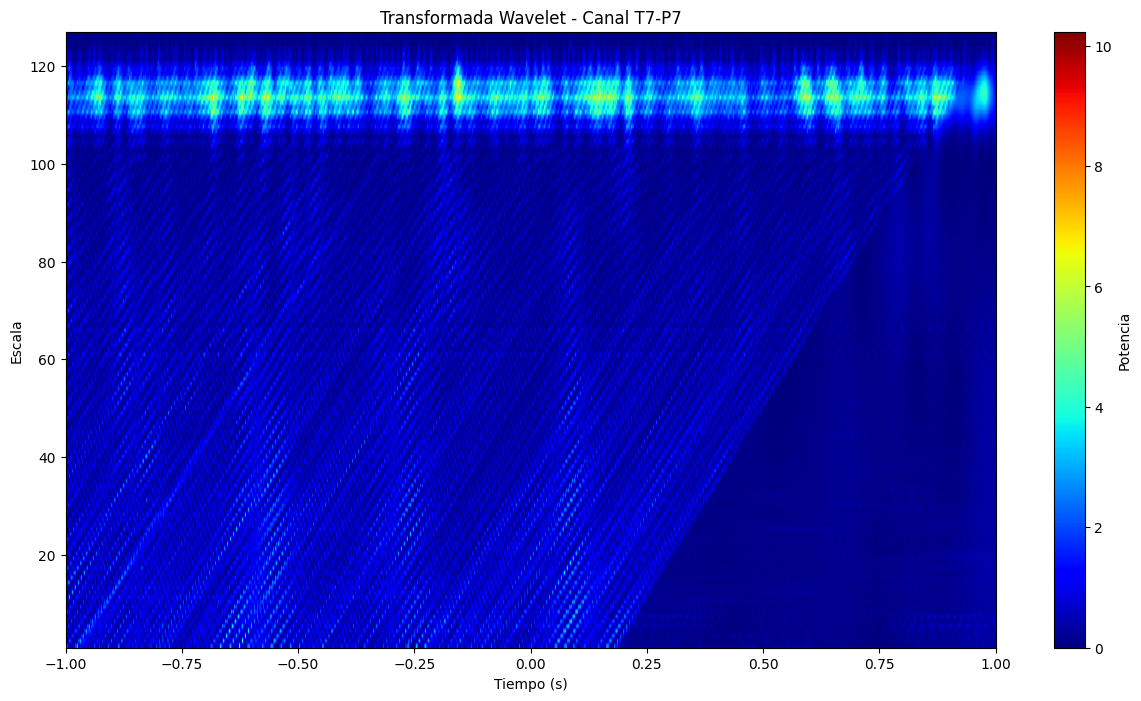

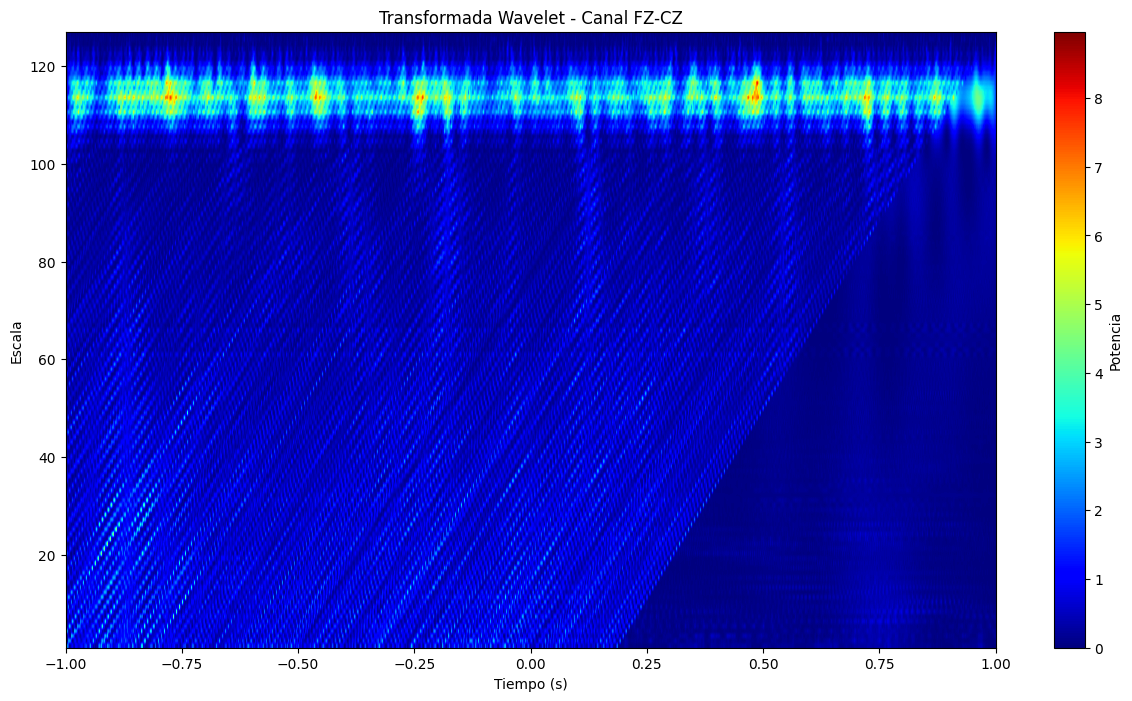

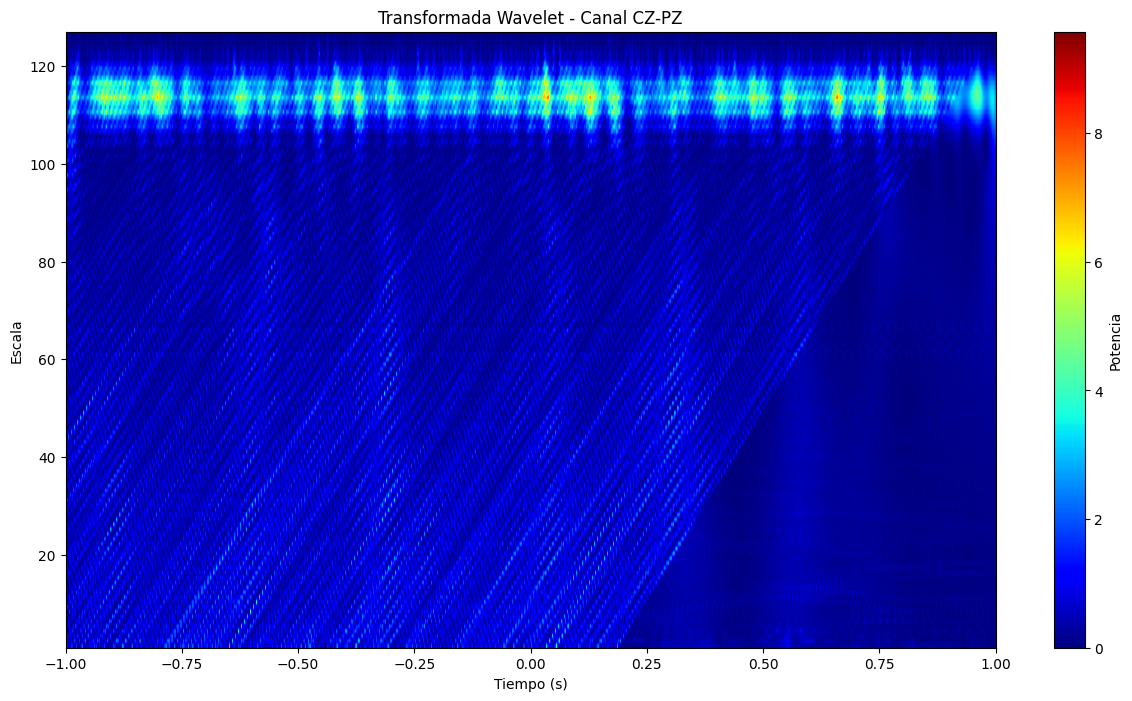

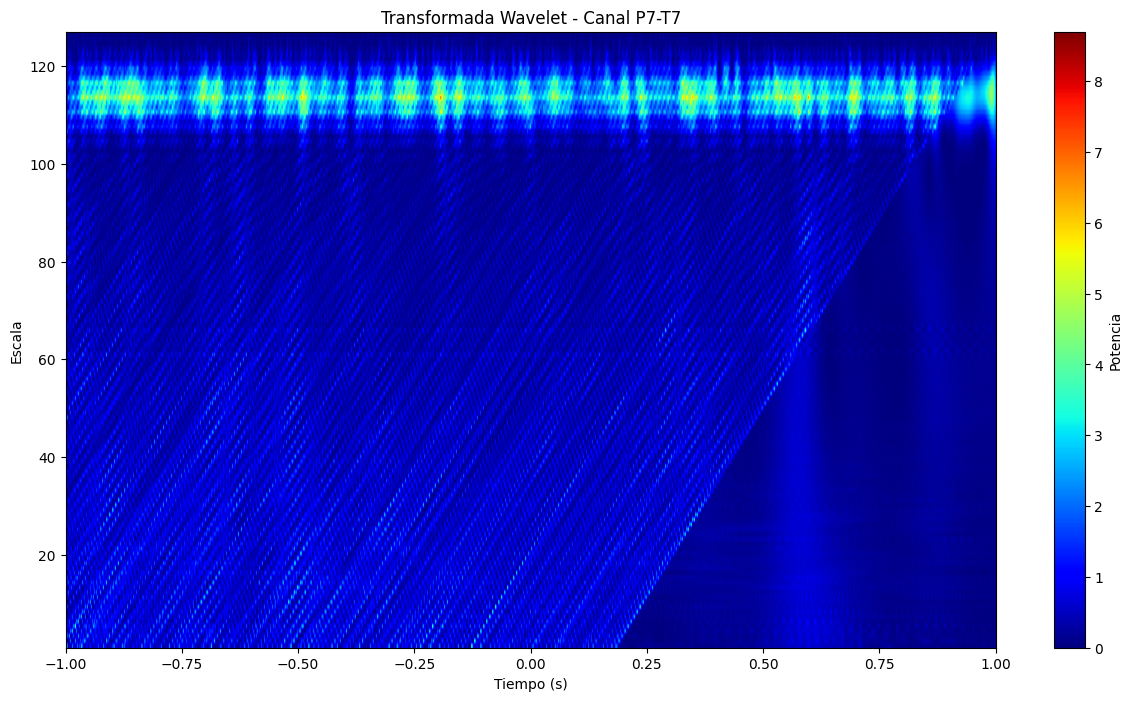

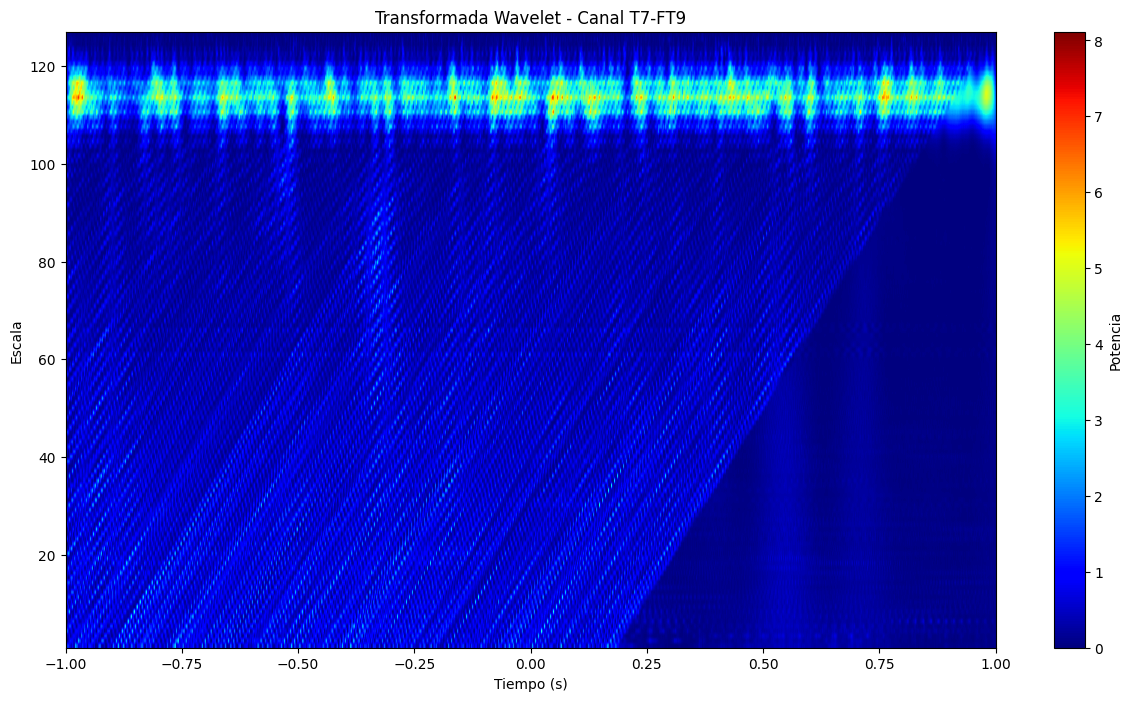

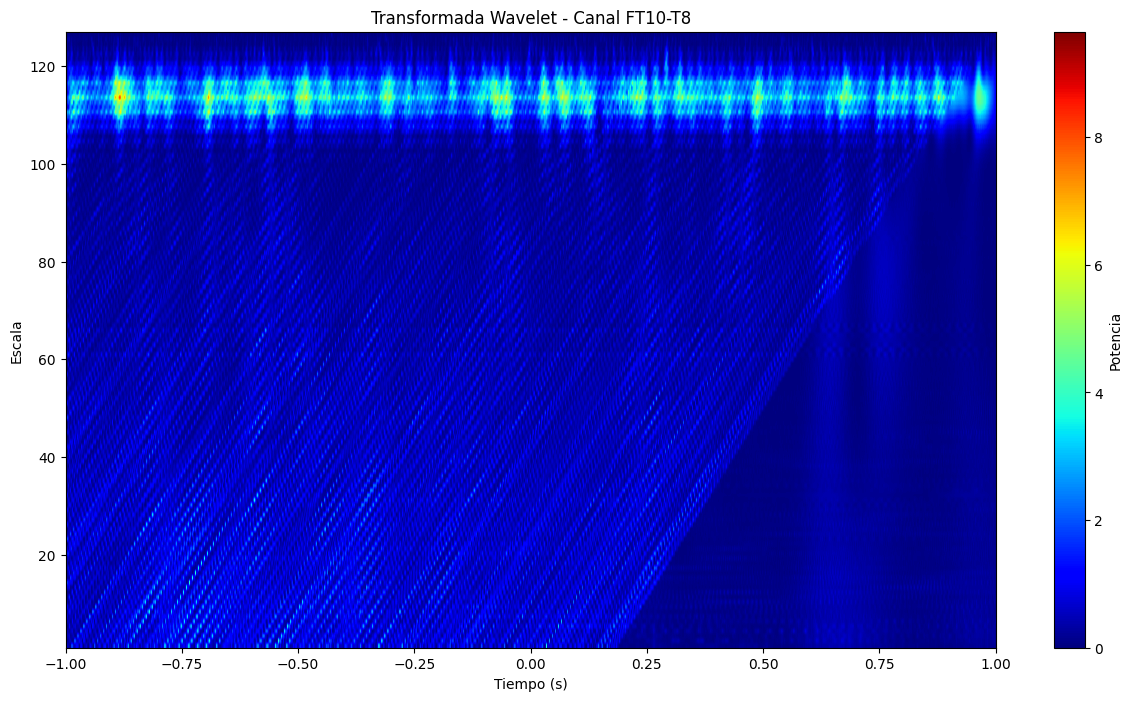

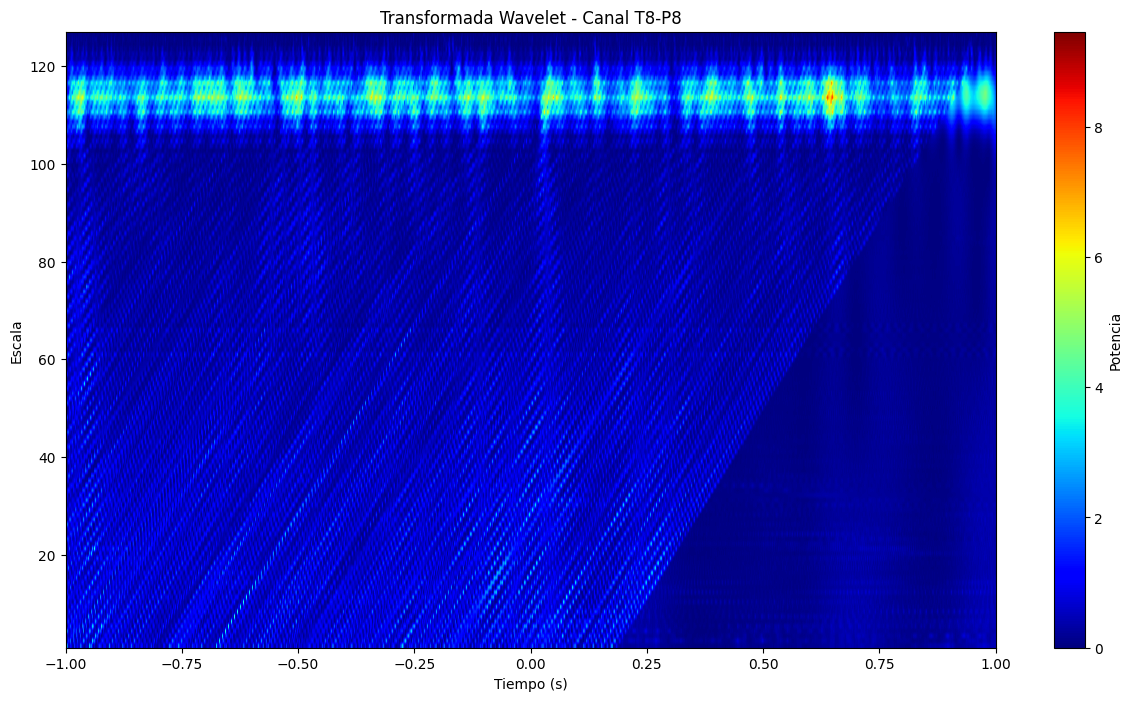

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal

def plot_wavelet(data, scales, wavelet, title):
    # Aplicar la transformada wavelet continua (CWT)
    coefficients, frequencies = pywt.cwt(data, scales, wavelet)

    # Obtener el valor absoluto de los coeficientes
    power = (np.abs(coefficients)) ** 2

    # Configurar el gráfico
    plt.figure(figsize=(15, 8))
    plt.imshow(power, extent=[-1, 1, 1, len(scales)], aspect='auto', cmap='jet', vmax=abs(power).max(), vmin=0)
    plt.colorbar(label='Potencia')

    # Añadir etiquetas y título
    plt.title(title)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Escala')

    # Mostrar el gráfico
    plt.show()

# Reemplaza con tus datos y canales
selected_channels = ['F7-T7', 'T7-P7', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT10-T8', 'T8-P8']

# Configuración de la señal de prueba (reemplaza esto con tus datos)
Fs = 250  # Frecuencia de muestreo
T = 10  # Duración de la señal en segundos
t = np.arange(0, T, 1/Fs)

# Generar una señal de prueba para cada canal
signal_data = np.zeros((len(t), len(selected_channels)))
for i, channel in enumerate(selected_channels):
    signal_data[:, i] = np.sin(2 * np.pi * 10 * t) + np.random.normal(scale=0.5, size=len(t))

# Parámetros de la CWT
scales = np.arange(1, 128)
wavelet = 'cmor'  # Puedes probar diferentes wavelets, 'cmor' es comúnmente utilizado

# Aplicar la transformada wavelet a cada canal y visualizar
for i, channel in enumerate(selected_channels):
    channel_data = signal_data[:, i]
    plot_wavelet(channel_data, scales, wavelet, f'Transformada Wavelet - Canal {channel}')


# Extracción de Características (Banda Alfa)


Potencia en la banda alfa del canal F7-T7: 1947020.7235567763


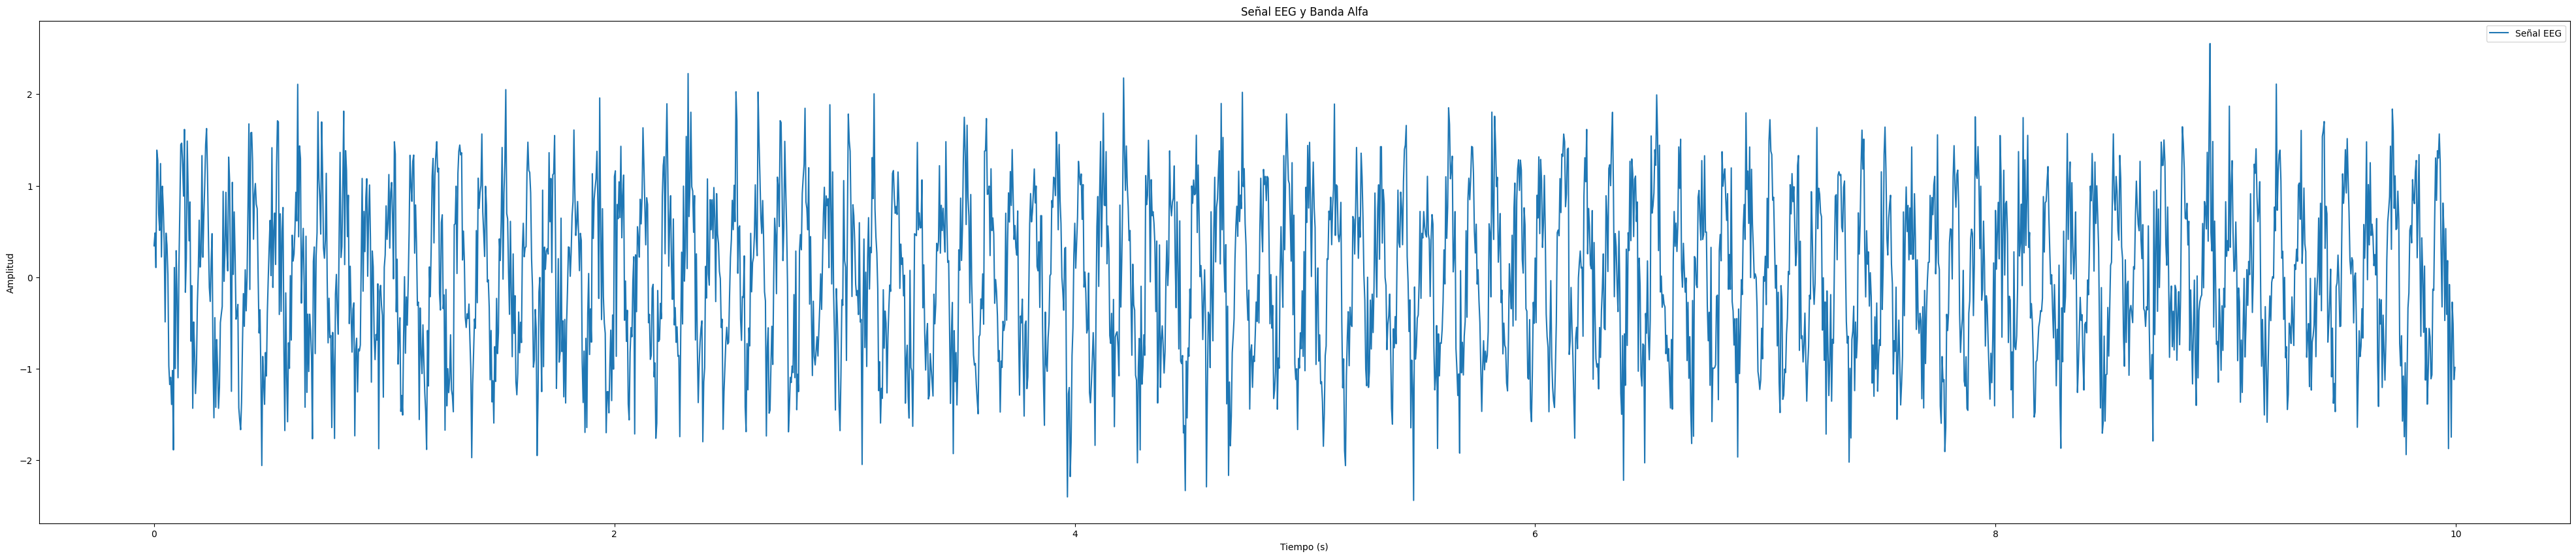

In [32]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Reemplaza con tus datos y canales
selected_channels = ['F7-T7', 'T7-P7', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT10-T8', 'T8-P8']

# Configuración de la señal de prueba (reemplaza esto con tus datos)
Fs = 250  # Frecuencia de muestreo
T = 10  # Duración de la señal en segundos
t = np.arange(0, T, 1/Fs)

# Generar una señal de prueba para cada canal
signal_data = np.zeros((len(t), len(selected_channels)))
for i, channel in enumerate(selected_channels):
    signal_data[:, i] = np.sin(2 * np.pi * 10 * t) + np.random.normal(scale=0.5, size=len(t))

# Elegir un canal específico (por ejemplo, el primer canal)
channel_index = 0
eeg_channel_data = signal_data[:, channel_index]

# Calcular la transformada de Fourier rápida (FFT) para la señal de EEG
fft_values = fft(eeg_channel_data)

# Definir las bandas de frecuencia
alpha_band = (8, 13)

# Calcular la potencia en la banda de frecuencia alfa
alpha_power = np.sum(np.abs(fft_values[(Fs * alpha_band[0]):(Fs * alpha_band[1])])**2)

# Imprimir la potencia en la banda de frecuencia alfa
print(f'Potencia en la banda alfa del canal {selected_channels[channel_index]}: {alpha_power}')

# Visualizar la señal de EEG y la ubicación de la banda alfa
plt.figure(figsize=(50, 10))  # Ajusta el tamaño aquí
plt.plot(t, eeg_channel_data, label='Señal EEG')

# Añadir detalles adicionales si es necesario
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal EEG y Banda Alfa')
plt.legend()
plt.show()


# Detección de convulsiones basado en banda alfa (Nuestros Canales ['F7-T7', 'T7-P7', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT10-T8', 'T8-P8'])

Extracting EDF parameters from /Users/diegoromero/Downloads/EDF Ploteo/chb02_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_924/3940535478.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_924/3940535478.py:12: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in an error because the following channel names are missing:
['T8-P8']
Either fix your included names or explicitly pass ordered=False.
  raw_data_subset = raw_data.pick_channels(selected_channels)


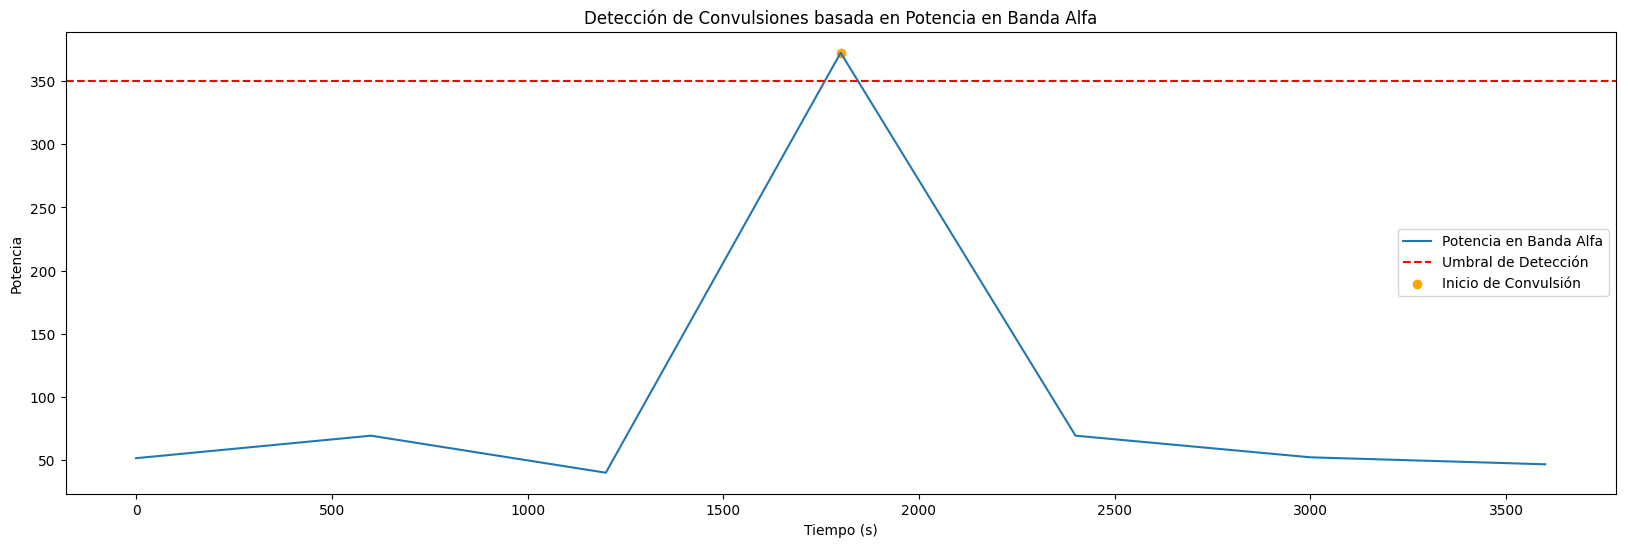

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import mne

# Reemplazar con la ruta correcta a tu archivo .edf
edf_file_path = "chb02_19.edf"

# Leer el archivo EDF y seleccionar canales
raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)
selected_channels = ['F7-T7', 'T7-P7', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT10-T8', 'T8-P8']
raw_data_subset = raw_data.pick_channels(selected_channels)

# Obtener datos de señal EEG
eeg_data, times = raw_data_subset[:, :]

# Configuración de frecuencia de muestreo y bandas de frecuencia
sfreq = raw_data_subset.info['sfreq']
alpha_band = (8, 13)

# Calcular la potencia en la banda de frecuencia alfa para cada canal
alpha_power = np.sum(np.abs(fft(eeg_data, axis=1)[:, int(sfreq * alpha_band[0]):int(sfreq * alpha_band[1])])**2, axis=1)

# Ajustar las dimensiones de times para que coincida con alpha_power
times = np.linspace(0, raw_data_subset.times[-1], len(alpha_power))

# Definir umbral de detección (ajusta este valor según tus necesidades)
threshold = 350

# Detección de convulsiones basada en potencia en banda alfa
seizure_points = np.where(alpha_power > threshold)[0]

# Visualizar la detección de convulsiones
plt.figure(figsize=(20, 6))
plt.plot(times, alpha_power, label='Potencia en Banda Alfa')
plt.axhline(y=threshold, color='red', linestyle='--', label='Umbral de Detección')
plt.scatter(times[seizure_points], alpha_power[seizure_points], color='orange', label='Inicio de Convulsión')
plt.title('Detección de Convulsiones basada en Potencia en Banda Alfa')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencia')
plt.legend()
plt.show()


# Detección de convulsiones basado en banda alfa (Todos los canales del .edf)

Extracting EDF parameters from /Users/diegoromero/Downloads/EDF Ploteo/chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693311  =      0.000 ... 14426.996 secs...


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_924/490462814.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)


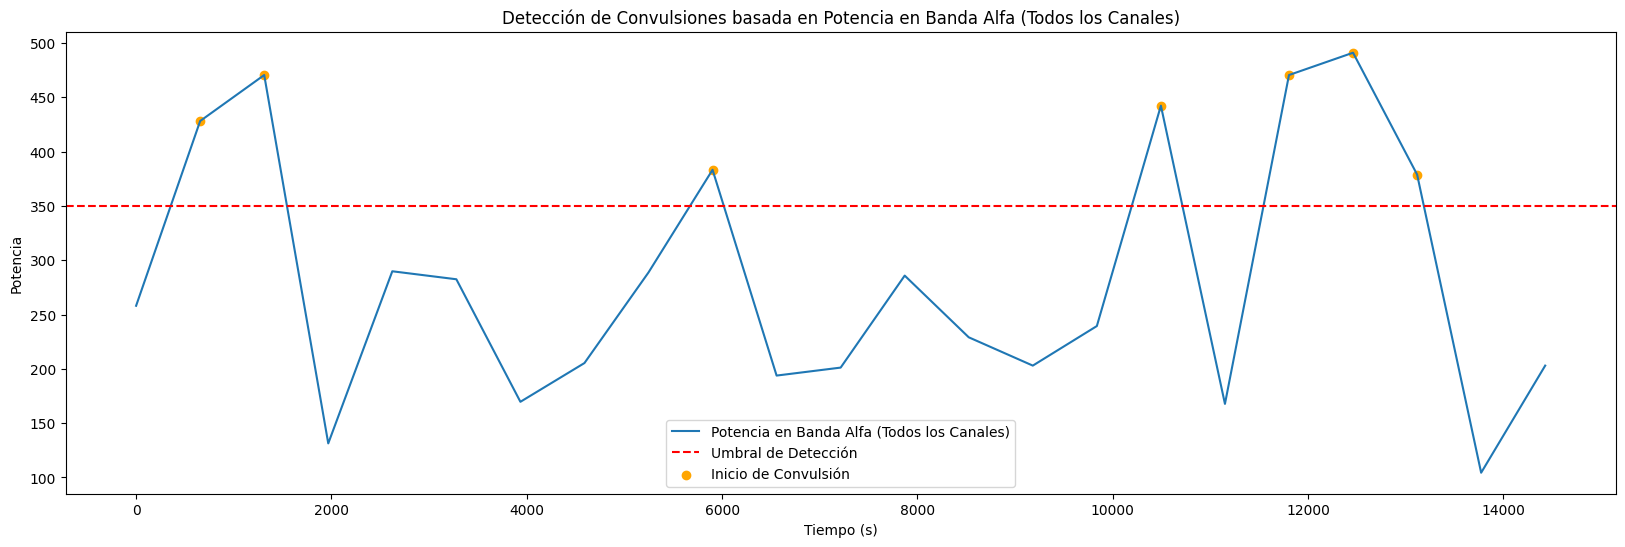

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import mne

# Reemplazar con la ruta correcta a tu archivo .edf
edf_file_path = "chb06_01.edf"

# Leer el archivo EDF
raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)

# Obtener datos de señal EEG y tiempos
eeg_data, times = raw_data[:, :]

# Configuración de frecuencia de muestreo y bandas de frecuencia
sfreq = raw_data.info['sfreq']
alpha_band = (8, 13)

# Calcular la potencia en la banda de frecuencia alfa para cada canal
alpha_power_all_channels = np.sum(np.abs(fft(eeg_data, axis=1)[:, int(sfreq * alpha_band[0]):int(sfreq * alpha_band[1])])**2, axis=1)

# Ajustar las dimensiones de times para que coincida con alpha_power_all_channels
times = np.linspace(0, raw_data.times[-1], len(alpha_power_all_channels))

# Definir umbral de detección (ajusta este valor según tus necesidades)
threshold = 350

# Detección de convulsiones basada en potencia en banda alfa
seizure_points_all_channels = np.where(alpha_power_all_channels > threshold)[0]

# Visualizar la detección de convulsiones para todos los canales
plt.figure(figsize=(20, 6))
plt.plot(times, alpha_power_all_channels, label='Potencia en Banda Alfa (Todos los Canales)')
plt.axhline(y=threshold, color='red', linestyle='--', label='Umbral de Detección')
plt.scatter(times[seizure_points_all_channels], alpha_power_all_channels[seizure_points_all_channels], color='orange', label='Inicio de Convulsión')
plt.title('Detección de Convulsiones basada en Potencia en Banda Alfa (Todos los Canales)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencia')
plt.legend()
plt.show()


Extracting EDF parameters from /Users/diegoromero/Downloads/EDF Ploteo/chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693311  =      0.000 ... 14426.996 secs...


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_924/3342908084.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)


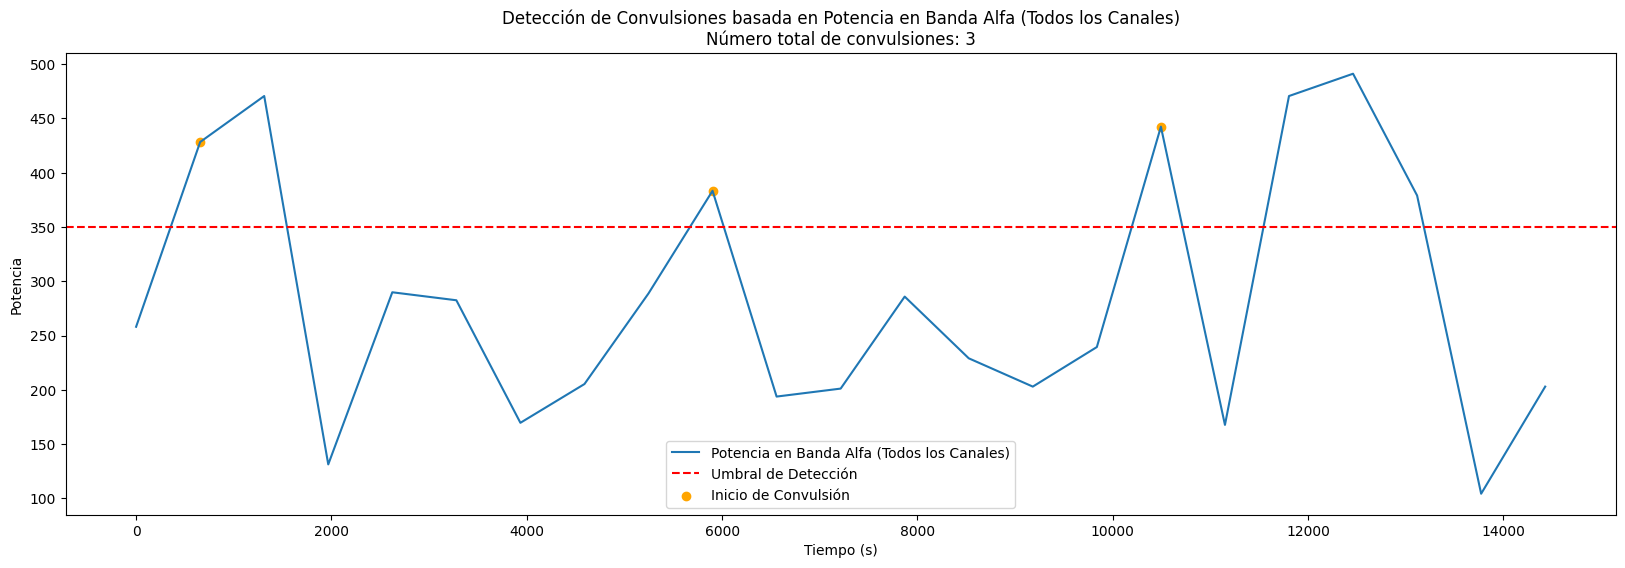

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import mne

# Reemplazar con la ruta correcta a tu archivo .edf
edf_file_path = "chb06_01.edf"

# Leer el archivo EDF
raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)

# Obtener datos de señal EEG y tiempos
eeg_data, times = raw_data[:, :]

# Configuración de frecuencia de muestreo y bandas de frecuencia
sfreq = raw_data.info['sfreq']
alpha_band = (8, 13)

# Calcular la potencia en la banda de frecuencia alfa para cada canal
alpha_power_all_channels = np.sum(np.abs(fft(eeg_data, axis=1)[:, int(sfreq * alpha_band[0]):int(sfreq * alpha_band[1])])**2, axis=1)

# Ajustar las dimensiones de times para que coincida con alpha_power_all_channels
times = np.linspace(0, raw_data.times[-1], len(alpha_power_all_channels))

# Definir umbral de detección (ajusta este valor según tus necesidades)
threshold = 350

# Detección de convulsiones basada en potencia en banda alfa
seizure_points_all_channels = np.where(alpha_power_all_channels > threshold)[0]

# Calcular la diferencia de tiempo entre picos consecutivos
time_diff = np.diff(times[seizure_points_all_channels])

# Establecer un umbral de tiempo entre convulsiones (ajusta este valor según tus necesidades)
time_threshold = 4000  # en segundos

# Filtrar picos que están demasiado cerca en el tiempo
filtered_seizure_points = [seizure_points_all_channels[0]]
for i in range(1, len(seizure_points_all_channels)):
    if time_diff[i - 1] > time_threshold:
        filtered_seizure_points.append(seizure_points_all_channels[i])

# Contar el número total de convulsiones
total_seizures = len(filtered_seizure_points)

# Visualizar la detección de convulsiones para todos los canales
plt.figure(figsize=(20, 6))
plt.plot(times, alpha_power_all_channels, label='Potencia en Banda Alfa (Todos los Canales)')
plt.axhline(y=threshold, color='red', linestyle='--', label='Umbral de Detección')
plt.scatter(times[filtered_seizure_points], alpha_power_all_channels[filtered_seizure_points], color='orange', label='Inicio de Convulsión')
plt.title(f'Detección de Convulsiones basada en Potencia en Banda Alfa (Todos los Canales)\nNúmero total de convulsiones: {total_seizures}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencia')
plt.legend()
plt.show()


# Pruebas Finales 


Extracting EDF parameters from /Users/diegoromero/Downloads/EDF Ploteo/chb06_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3394815  =      0.000 ... 13260.996 secs...


/var/folders/dm/6z1w5xyj71n8lhvl9jswsdcr0000gn/T/ipykernel_2571/1346475592.py:10: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)


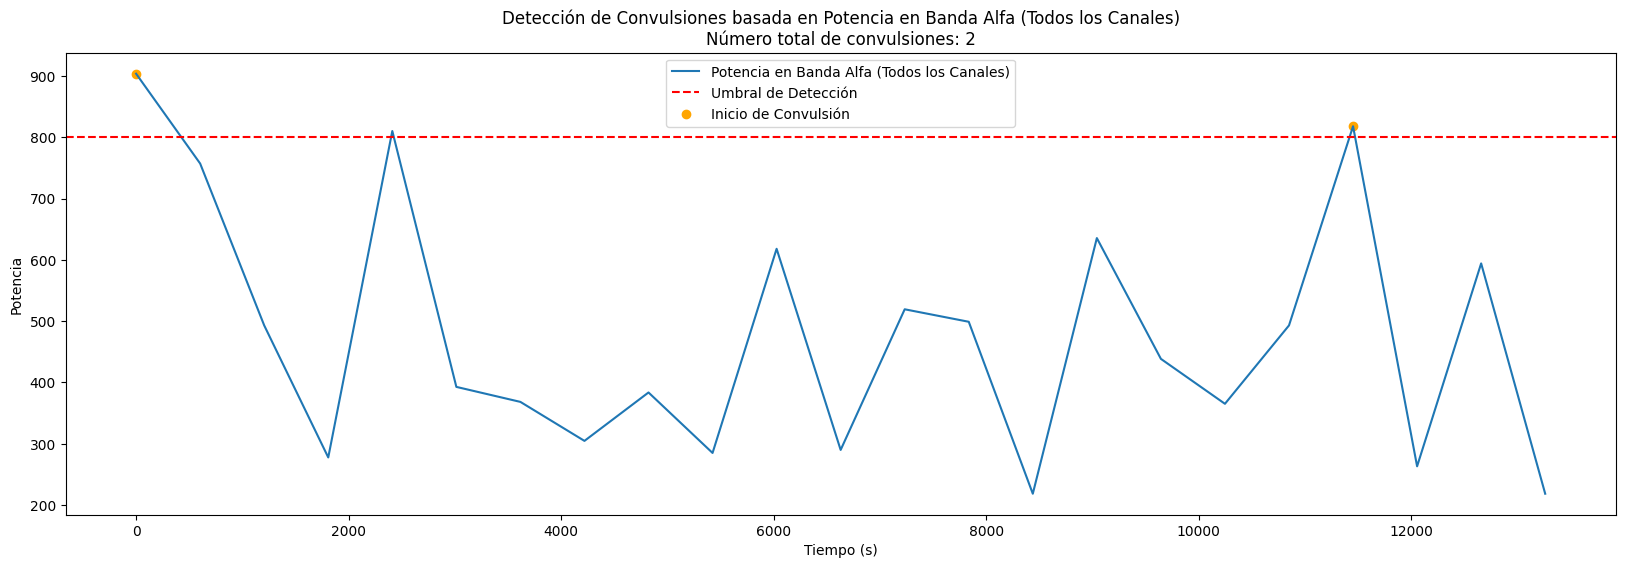

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import mne

# Reemplazar con la ruta correcta a tu archivo .edf
edf_file_path = "chb06_04.edf"

# Leer el archivo EDF
raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)

# Obtener datos de señal EEG y tiempos
eeg_data, times = raw_data[:, :]

# Configuración de frecuencia de muestreo y bandas de frecuencia
sfreq = raw_data.info['sfreq']
alpha_band = (8, 13)

# Calcular la potencia en la banda de frecuencia alfa para cada canal
alpha_power_all_channels = np.sum(np.abs(fft(eeg_data, axis=1)[:, int(sfreq * alpha_band[0]):int(sfreq * alpha_band[1])])**2, axis=1)

# Ajustar las dimensiones de times para que coincida con alpha_power_all_channels
times = np.linspace(0, raw_data.times[-1], len(alpha_power_all_channels))

# Definir umbral de detección (ajusta este valor según tus necesidades)
threshold = 800

# Detección de convulsiones basada en potencia en banda alfa
seizure_points_all_channels = np.where(alpha_power_all_channels > threshold)[0]

# Calcular la diferencia de tiempo entre picos consecutivos
time_diff = np.diff(times[seizure_points_all_channels])

# Establecer un umbral de tiempo entre convulsiones (ajusta este valor según tus necesidades)
time_threshold = 4000  # en segundos

# Filtrar picos que están demasiado cerca en el tiempo
filtered_seizure_points = [seizure_points_all_channels[0]]
for i in range(1, len(seizure_points_all_channels)):
    if time_diff[i - 1] > time_threshold:
        filtered_seizure_points.append(seizure_points_all_channels[i])

# Contar el número total de convulsiones
total_seizures = len(filtered_seizure_points)

# Visualizar la detección de convulsiones para todos los canales
plt.figure(figsize=(20, 6))
plt.plot(times, alpha_power_all_channels, label='Potencia en Banda Alfa (Todos los Canales)')
plt.axhline(y=threshold, color='red', linestyle='--', label='Umbral de Detección')
plt.scatter(times[filtered_seizure_points], alpha_power_all_channels[filtered_seizure_points], color='orange', label='Inicio de Convulsión')
plt.title(f'Detección de Convulsiones basada en Potencia en Banda Alfa (Todos los Canales)\nNúmero total de convulsiones: {total_seizures}')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencia')
plt.legend()
plt.show()
